# Niblack and Sauvola Thresholding Segmentation

# Imports

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from skimage.filters import threshold_multiotsu
from skimage.filters import threshold_otsu, threshold_niblack, threshold_sauvola

# Load Image

In [24]:
abnormal_image = cv.imread('../../images/abnormal.jpg')
normal_image = cv.imread('../../images/normal.jpg')

abnormal_image = cv.cvtColor(abnormal_image, cv.COLOR_BGR2RGB)
normal_image = cv.cvtColor(normal_image, cv.COLOR_BGR2RGB)

abnormal_image_gray = cv.cvtColor(abnormal_image, cv.COLOR_BGR2GRAY)
normal_image_gray = cv.cvtColor(normal_image, cv.COLOR_BGR2GRAY)

# Define Threshold

In [25]:
binary_global_abnormal = abnormal_image_gray > threshold_otsu(abnormal_image_gray)
binary_global_normal = normal_image_gray > threshold_otsu(normal_image_gray)


window_size = 21
thresh_niblack_abnormal = threshold_niblack(abnormal_image_gray, window_size=window_size, k=0.2)
thresh_sauvola_abnormal = threshold_sauvola(abnormal_image_gray, window_size=window_size)
thresh_niblack_normal = threshold_niblack(normal_image_gray, window_size=window_size, k=0.2)
thresh_sauvola_normal = threshold_sauvola(normal_image_gray, window_size=window_size)

# Get Binary Mask

In [26]:
binary_niblack_abnormal = abnormal_image_gray > thresh_niblack_abnormal
binary_sauvola_abnormal = abnormal_image_gray > thresh_sauvola_abnormal

binary_niblack_normal = normal_image_gray > thresh_niblack_normal
binary_sauvola_normal = normal_image_gray > thresh_sauvola_normal

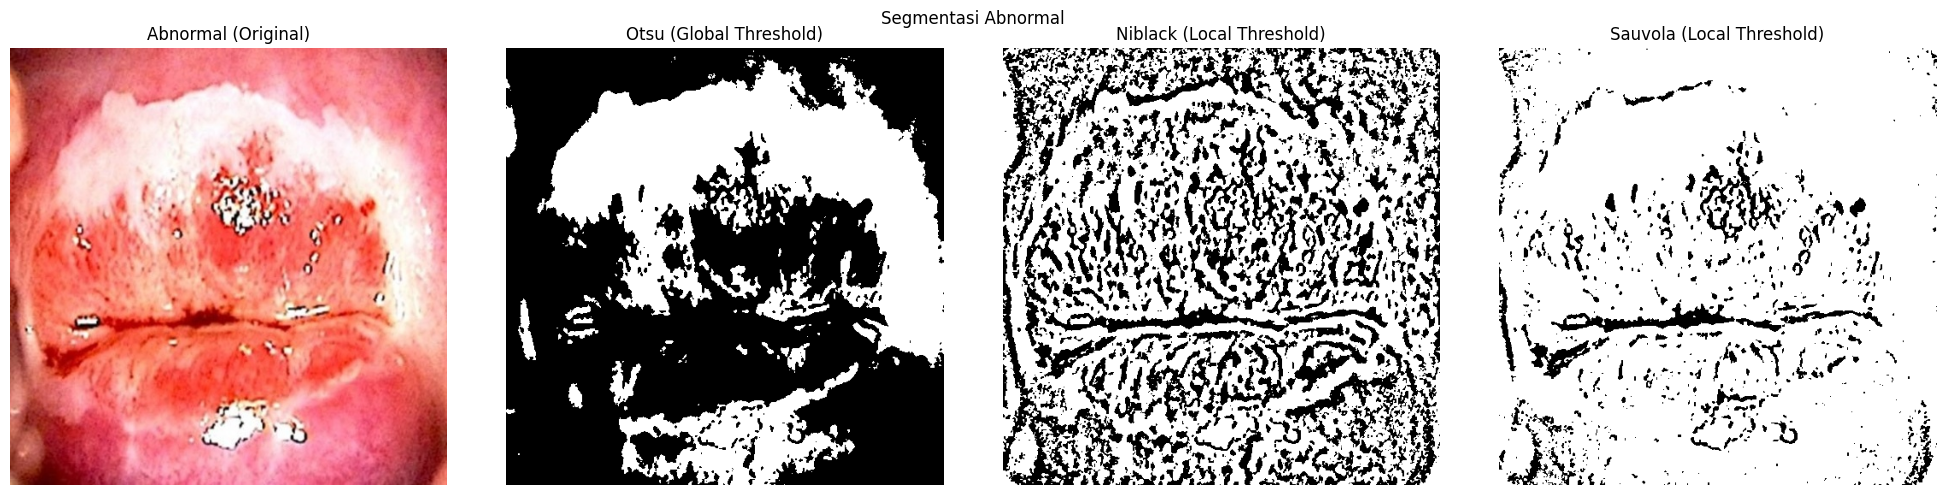

In [27]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(abnormal_image, cmap='gray')
ax[0].set_title('Abnormal (Original)')
ax[0].axis('off')

ax[1].imshow(binary_global_abnormal, cmap='gray')
ax[1].set_title('Otsu (Global Threshold)')
ax[1].axis('off')

ax[2].imshow(binary_niblack_abnormal, cmap='gray')
ax[2].set_title('Niblack (Local Threshold)')
ax[2].axis('off')

ax[3].imshow(binary_sauvola_abnormal, cmap='gray')
ax[3].set_title('Sauvola (Local Threshold)')
ax[3].axis('off')

plt.suptitle('Segmentasi Abnormal')
plt.tight_layout()
plt.show()

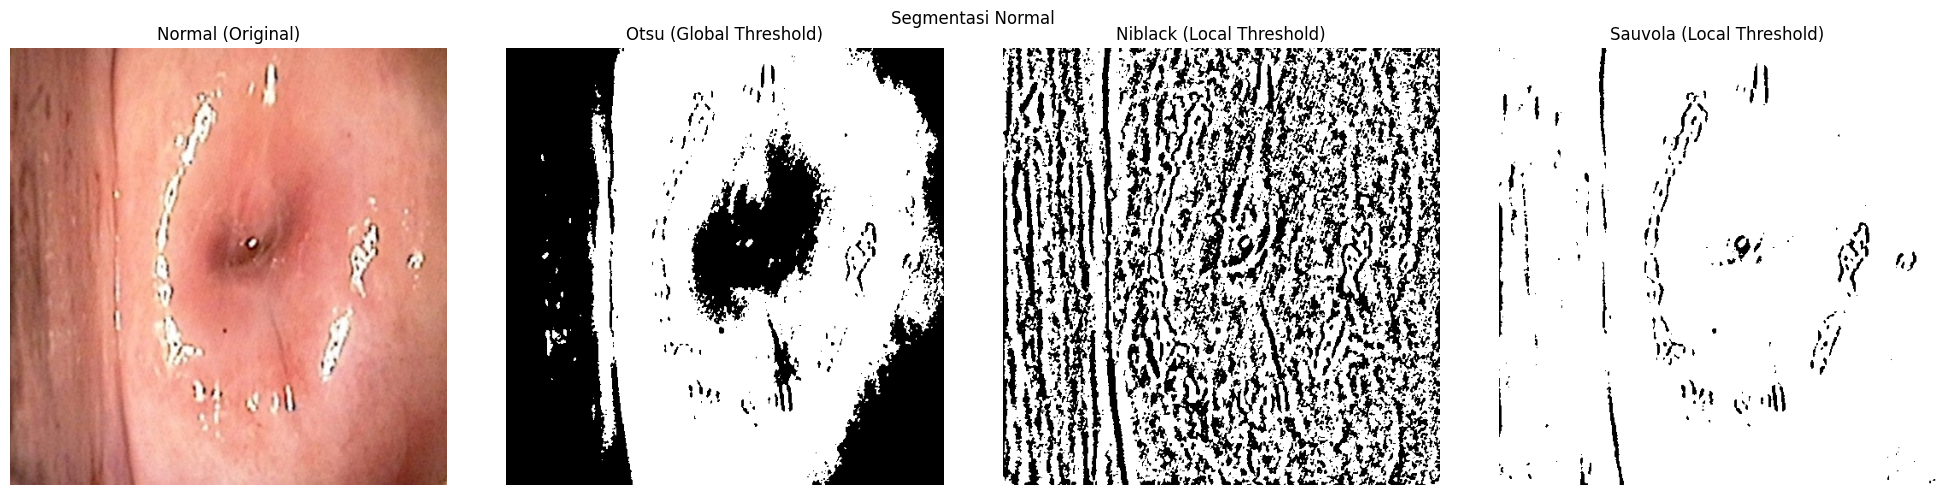

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(normal_image, cmap='gray')
ax[0].set_title('Normal (Original)')
ax[0].axis('off')

ax[1].imshow(binary_global_normal, cmap='gray')
ax[1].set_title('Otsu (Global Threshold)')
ax[1].axis('off')

ax[2].imshow(binary_niblack_normal, cmap='gray')
ax[2].set_title('Niblack (Local Threshold)')
ax[2].axis('off')

ax[3].imshow(binary_sauvola_normal, cmap='gray')
ax[3].set_title('Sauvola (Local Threshold)')
ax[3].axis('off')

plt.suptitle('Segmentasi Normal')
plt.tight_layout()
plt.show()